In [8]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

/tmp/ipykernel_94/1797292507.py:2: RuntimeWarning: divide by zero encountered in power
  Cl = ell**(-3.)


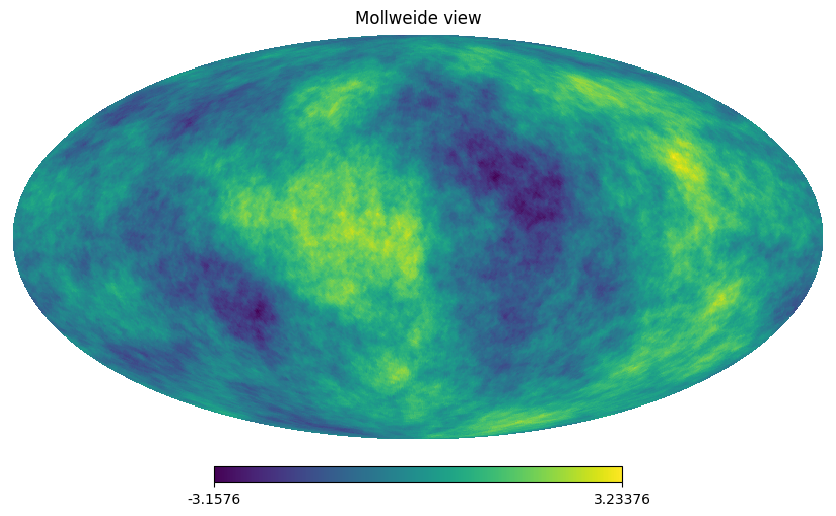

In [9]:
ell = np.arange(0, 1000)
Cl = ell**(-3.)
Cl[0:2] = 0.0
Nside = 128
mp = hp.synfast(Cl, nside=128, verbose=False)
mp /= mp.std()
hp.mollview(mp)



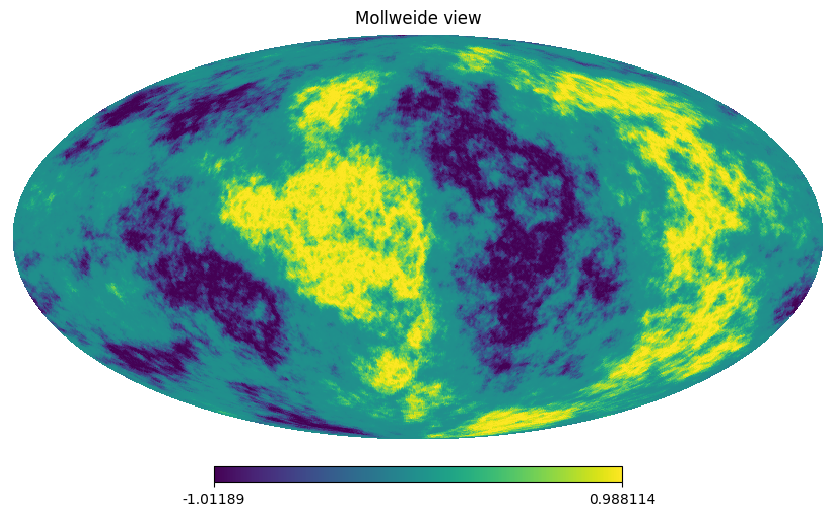

In [10]:
sysmap = np.sin(mp)**3
sysmap = sysmap - np.mean(sysmap)
hp.mollview(sysmap)

In [11]:
# Uncooment for fun
#sysmap, mp = mp,sysmap

<Figure size 640x480 with 0 Axes>

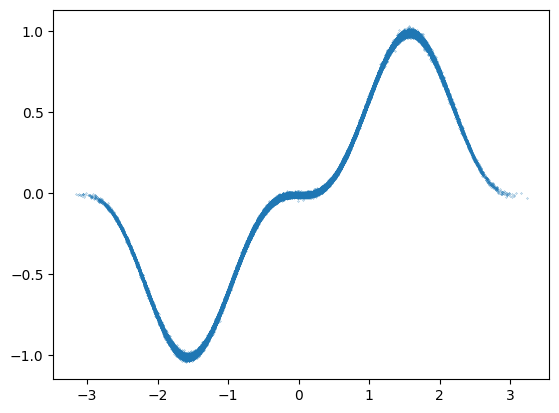

<Figure size 640x480 with 0 Axes>

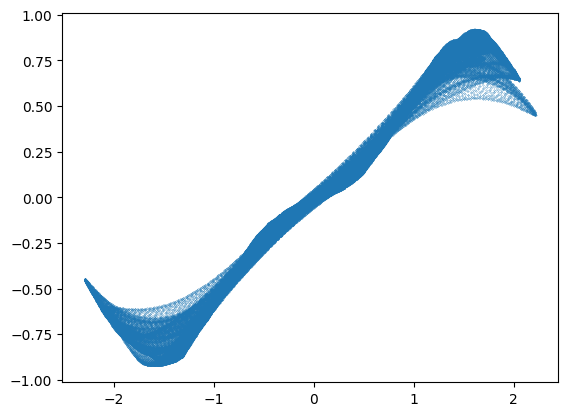

<Figure size 640x480 with 0 Axes>

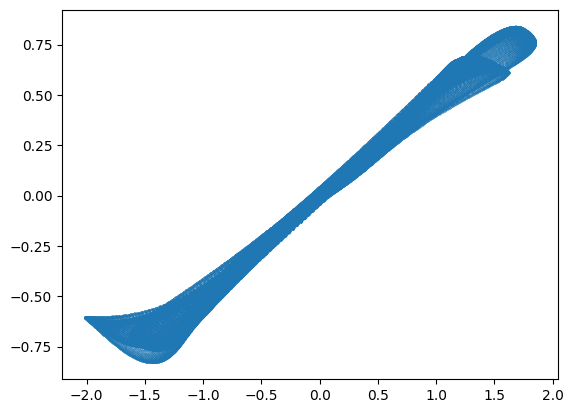

<Figure size 640x480 with 0 Axes>

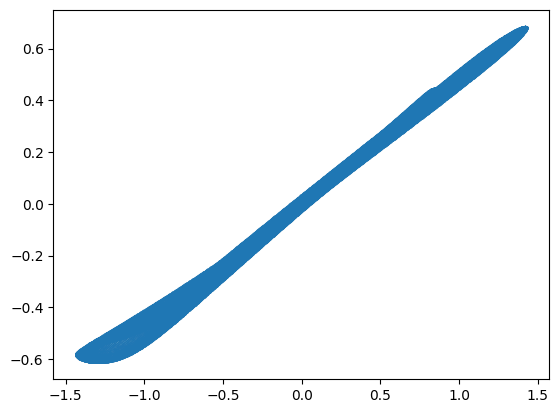

In [12]:
smrat = [0,10,20,40]
for smooth in smrat:
    mapsmooth = hp.smoothing(mp, fwhm=np.radians(smooth))
    syssmooth = hp.smoothing(sysmap, fwhm=np.radians(smooth))
    plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(mapsmooth,syssmooth,marker='.',s=0.2)
    



2.3855705486945194e-07 1.1799451404952607e-08
0.4857215095407775
-1.0693653194430533e-08 -3.2134890053219417e-07
0.5166342893244853
-3.8342553023915094e-07 -4.5792649238339533e-07
0.5587086644728879
-4.145780862982451e-07 -4.310912296417076e-07
0.6989916236020199


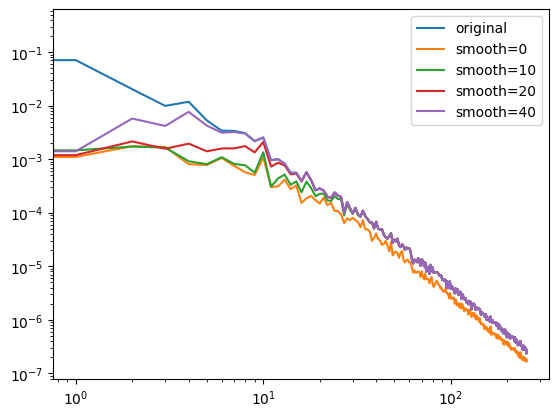

In [17]:
fig,ax  = plt.subplots()
cl = hp.anafast(sysmap, lmax=Nside*2)
ax.plot(cl[2:], label='original')

for smooth in smrat:
    mapsmooth = hp.smoothing(mp, fwhm=np.radians(smooth))
    syssmooth = hp.smoothing(sysmap, fwhm=np.radians(smooth))
    print (mapsmooth.mean(), syssmooth.mean())
  
    coef = (sysmap*mapsmooth).sum()/(mapsmooth**2).sum()
    print (coef)
    sysclean = sysmap-coef*mapsmooth
    cl_clean = hp.anafast(sysclean, lmax=Nside*2)
    
    ax.plot(cl_clean[2:], label='smooth={}'.format(smooth))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
#ax.set_ylim(1e-4,1e-1)

0.3
0.3333333333333333
0.36666666666666664
0.4
0.43333333333333335
0.4666666666666667
0.5
0.5333333333333333
0.5666666666666667
0.6


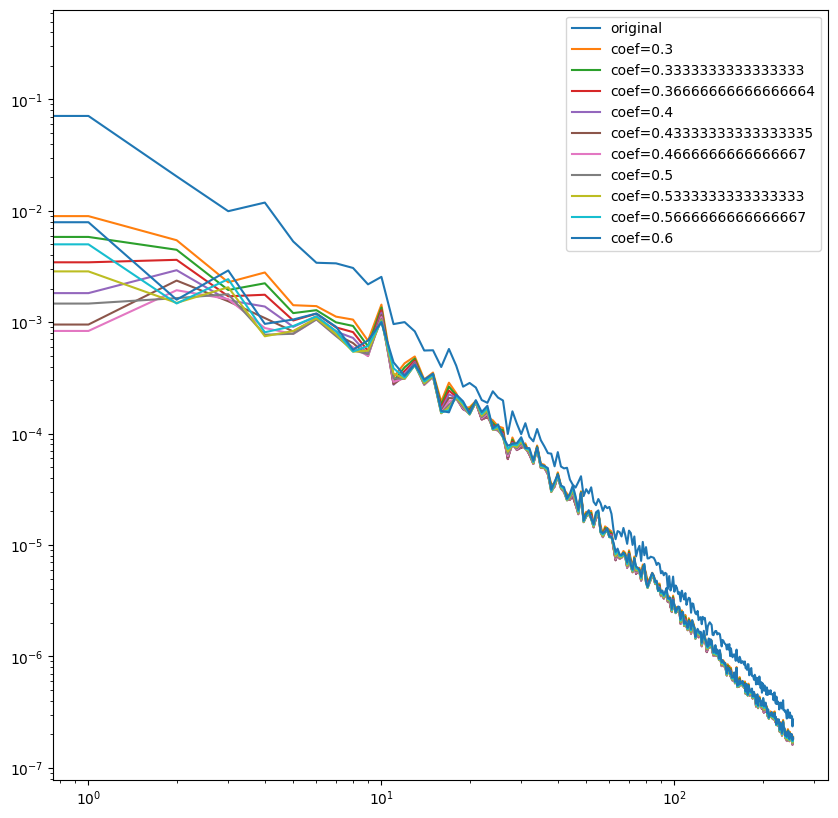

In [14]:
fig,ax  = plt.subplots(figsize=(10,10))
cl = hp.anafast(sysmap, lmax=Nside*2)
ax.plot(cl[2:], label='original')

for coef in np.linspace (0.3,0.6,10):
  
    print (coef)
    sysclean = sysmap-coef*mp
    cl_clean = hp.anafast(sysclean, lmax=Nside*2)
    
    ax.plot(cl_clean[2:], label='coef={}'.format(coef))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()